In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load Data and Cleaning Data
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", skipinitialspace=True)
dataset = dataset.drop(['77516','13','2174','0', 'Not-in-family', '40'],axis=1)
dataset = dataset.rename(columns={'39': 'Age', 'State-gov': 'WorkClass',' Bachelors': 'Education', 'Never-married': 'Marriage Status', 'Adm-clerical': 'Occupation', 'Not-in-family': 'Relationship', 'White': 'Race', 'Male': 'Gender','United-States': 'Country of Origin', '<=50K': 'Income'})
dataset.fillna(np.nan)
dataset.drop_duplicates()
dataset.dropna()
dataset = dataset.sort_values("Age", ascending=True)
dataset = dataset.reset_index()
dataset = dataset.drop(columns=['index'])
dataset.shape
dataset.head()
dataset.columns
display(dataset)


,Age,WorkClass,Bachelors,Marriage Status,Occupation,Race,Gender,Country of Origin,Income
0,17,?,10th,Never-married,?,White,Male,United-States,<=50K
1,17,Self-emp-not-inc,12th,Never-married,Handlers-cleaners,White,Male,United-States,<=50K
2,17,Private,11th,Never-married,Sales,White,Female,United-States,<=50K
3,17,Local-gov,12th,Never-married,Adm-clerical,White,Female,United-States,<=50K
4,17,?,10th,Never-married,?,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,90,Private,HS-grad,Never-married,Other-service,White,Female,United-States,<=50K
32556,90,?,Some-college,Never-married,?,Asian-Pac-Islander,Male,South,<=50K
32557,90,Private,11th,Married-civ-spouse,Craft-repair,White,Male,United-States,<=50K
32558,90,Private,Masters,Never-married,Exec-managerial,White,Female,United-States,<=50K


# Analysis Pipeline

How to create the same Dataset:
1. Importing
    * Import numpy, pandas, matplotlib and seaborn
    * Import the csv at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data using pandas and matplotlib, make sure to include skipinitialspace as there is one in this dataset
1. Clean data
    * Fill empty values with NaN and drop those values
    * Drop any duplicates that may exist
1. Wrangle/Process Data
    * Drop unecessary columns like Capital Gains Losses and family relationship
    * Rename the columns of the dataset since the first row does not include the catagories for each column
    * Sorting the age by ascending order, makes age based graphs more easier and allows us to see max and min age
    * Be sure to reset index and drop the newly created index column
1. Wrangle/Graphing
    * Create a countplot for Income 
    * Create a countplot for Gender
    * Create a dist plot for Age
    * Create a value count graph for Race

Note: Sometimes you may get an error like "Tuple does not support attribute head", to fix this simply restart Jupyter Lab.


In [7]:
def load_and_process(url_or_path_to_csv_file):
    dataset = (
        pd.read_csv(url_or_path_to_csv_file, skipinitialspace=True)
           .rename(columns={'39': 'Age', 'State-gov': 'WorkClass', '77516': 'fnlwgt', ' Bachelors': 'Education', 'Never-married': 'Marriage Status', 'Adm-clerical': 'Occupation', 'Not-in-family': 'Relationship', 'White': 'Race', 'Male': 'Gender', '2174': 'Capital Gain', ' 0': 'Capital Loss', '40': 'Hours Worked Per Week', 'United-States': 'Country of Origin', '<=50K': 'Income'})
            .drop(['77516','13','2174','0', 'Not-in-family', '40'],axis=1)
            .fillna(np.nan)
            .drop_duplicates()
            .dropna()
            .sort_values("Age", ascending=True)
            .reset_index()
            .drop(columns=['index'])
    )
    return dataset
        
    

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

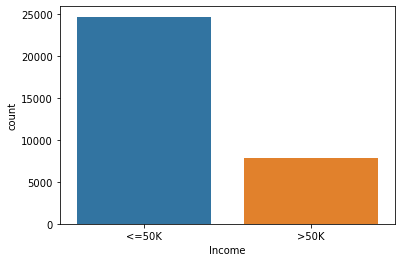

In [6]:
#Data Processing

sns.countplot(dataset['Income'],label="Income Distribution")

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

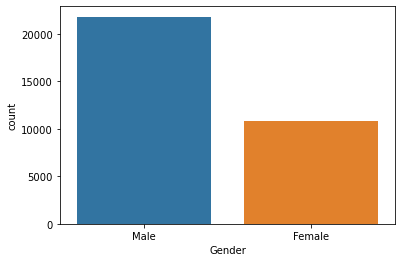

In [7]:
#Data Processing

sns.countplot(dataset['Gender'],label="Gender Distribution")

/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

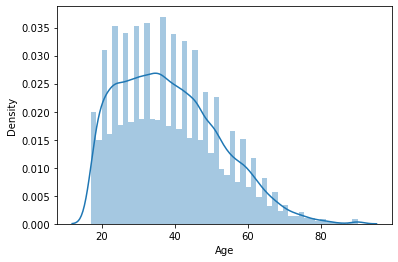

In [8]:
sns.distplot(dataset["Age"])

<AxesSubplot:>

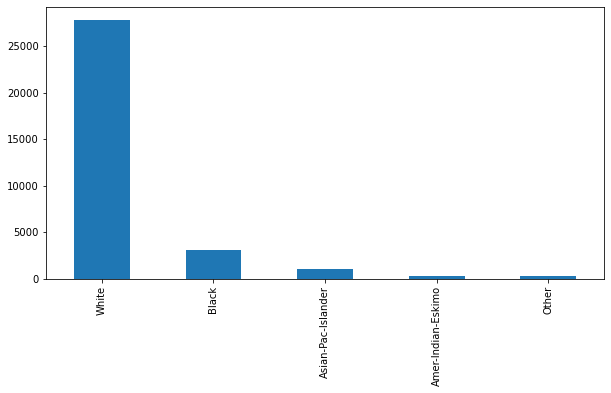

In [9]:
dataset.Race.value_counts().plot(kind='bar', figsize=(10,5))

# EDA
The question I want to research is wether there is a correlation between Income and Gender and Income and Race. To try to tackle this question I plotted the data given so I could get a better scope of the data I was using. 

At first I wanted to do an analysis on wether older people made more money than younger people so, I plotted a graph which showed the age density in the dataset. This showed that there was a stronger density around middle age people and therefore may make my data on older people less reliable since there is a smaller pool of data to analyse. I decided not to do an analysis because of this reason.

As for the Gender graphs I wanted to see if they were directly proportional which in this Census data, it was not. There were almost double the amount of men than women in the pool. With the under representation of women the data may not be as precise as to the true income of women compared to men, I would probably need to use percentages instead of simply counting values to represent the difference in wage between men and women. 

The income graph tells the same story, there is an over representation is people making under 50k. This data makes sense since the average income in the USA was 34,076$ (https://www.census.gov/library/publications/1996/demo/p60-193.html) . Observing the gender and income graphs we can see that the highest representation is of males and making over 50k which could represent the possibility of men making more than women. 

After graphing the representations of different races, there are much more white people represented in the census data than any other race. I believe this is because this census data was taken in the 90s. If this census data were to be taken today, there would be a much higher representation of other races due to immigration. With this gathered data, I hypothesize that White men would make the most amount of money since they are the majority in both race and gender.

